<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Linear_regression_for_advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear regression for advertisement:** Advertising Sales Prediction using Machine Learning

**Project Overview:**
In this project, I utilized advertising data obtained from Kaggle to develop a machine learning model that predicts sales based on various advertising channels, namely TV, newspaper, and radio. The goal was to understand the impact of different marketing channels on product sales and create a reliable predictive model.

**Technologies and Tools Used:**
- **Machine Learning Library:** Keras
- **Optimizer:** Adam
- **Dataset Handling:** pandas for data manipulation
- **Data Splitting:** `train_test_split` from `sklearn.model_selection`
- **Loss Function:** Mean Squared Error (MSE)
- **Learning Rate:** 0.1
- **Training Epochs:** 100 (epochs written in plural form)

**Methodology:**
1. **Data Acquisition:**
   - I obtained the dataset from Kaggle, which provided information about advertising expenses across various channels and corresponding sales figures.

2. **Data Preprocessing:**
   - The dataset underwent preprocessing, including data cleaning, handling missing values (if any), and feature selection. This step ensured the data was suitable for training.

3. **Model Selection:**
   - I chose to implement a multi-variable linear regression model using the Keras library. This model was well-suited for the task of predicting sales based on advertising spending.

4. **Optimizer and Loss Function:**
   - I employed the Adam optimizer to train the model. The chosen loss function was Mean Squared Error (MSE), which is appropriate for regression tasks.

5. **Training and Validation:**
   - The dataset was split into training and validation sets, with 80% of the data used for training and 20% for validation. This ensured that the model was evaluated on unseen data to assess its generalization performance.

6. **Model Training:**
   - The model was trained for 100 epochs, allowing it to learn the underlying relationships between advertising spending and sales.

7. **Evaluation:**
   - After training, I evaluated the model's performance using the validation data. This involved making predictions and comparing them with the actual sales figures.

8. **Graphical Representation:**
   - To visually assess the model's performance, I created a graph illustrating the predicted sales based on TV advertising spending. This allowed for a clear understanding of how well the model captured the relationship.

**Conclusion:**
This project successfully demonstrated the efficacy of utilizing machine learning techniques to predict sales based on advertising expenses. The model showed promising results, which could potentially be leveraged by businesses to optimize their marketing strategies and allocate resources more effectively.

**Next Steps:**
Possible future steps for this project could include exploring additional features, fine-tuning hyperparameters, and potentially deploying the model in a real-world business scenario to further assess its practical utility.


### Downloaded dataset from Kaggle

https://www.kaggle.com/ashydv/advertising-dataset



In [ ]:
!kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 3.45MB/s]


In [ ]:
!unzip /content/advertising-dataset.zip

### **Single-variable linear regression**


> Predicting Sales based on TV Advertising Spend

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
print(df.shape)

### Overview of dataset using graph

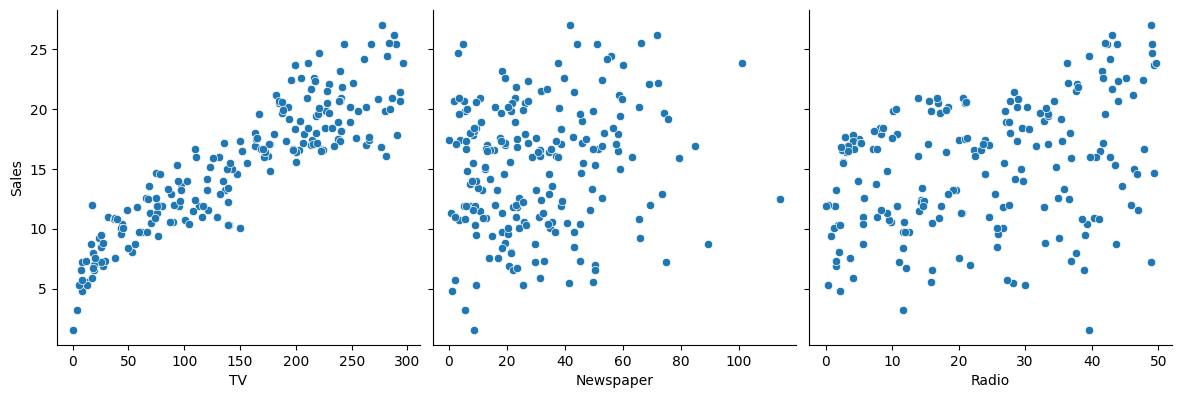

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

###Data Preprocessing

In [ ]:
x_data = np.array(df[['TV']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


In [ ]:
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200, 1)


### Dataset Splitting
80% for Training Data, 20% for Validation Data

**Note** For convenience, I did not split the test data. I only divided my data into training and validation set.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


### Training

In [ ]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100
)

Epoch 1/100
5/5 [==============================] - 1s 48ms/step - loss: 36885.8125 - val_loss: 21305.2109
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 12091.2246 - val_loss: 4358.3540
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 1557.9192 - val_loss: 17.8027
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 372.0985 - val_loss: 1462.8195
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 1812.8328 - val_loss: 2454.8091
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 1972.6364 - val_loss: 1515.4563
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 906.1194 - val_loss: 323.8408
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 112.2295 - val_loss: 19.5815
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 77.6065 - val_loss: 193.6834
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 21

### Predictions using the validation data

2/2 [==============================] - 0s 6ms/step


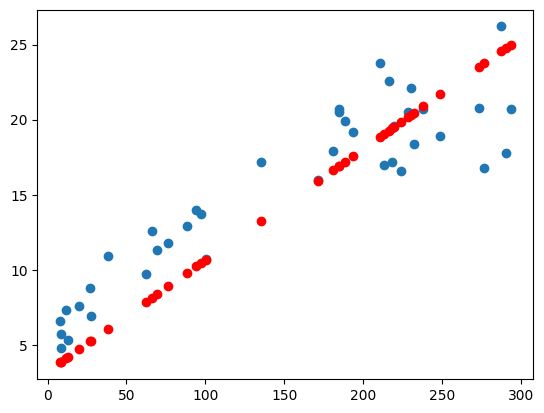

In [ ]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()

### **Single-variable linear regression**


> Predicting Sales based on TV, Newspaper, and Radio Advertising Spend

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('advertising.csv')

x_data = np.array(df[['TV', 'Newspaper', 'Radio']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

x_data = x_data.reshape((-1, 3))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100
)

(200, 3)
(200, 1)
(160, 3) (40, 3)
(160, 1) (40, 1)
Epoch 1/100
5/5 [==============================] - 0s 46ms/step - loss: 1302.5676 - val_loss: 550.1175
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 314.2723 - val_loss: 127.3517
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 119.5847 - val_loss: 35.9886
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 104.9571 - val_loss: 127.3116
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 104.7508 - val_loss: 100.9155
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 57.7571 - val_loss: 58.7689
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 29.9042 - val_loss: 10.3881
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 16.1542 - val_loss: 12.1716
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 17.2530 - val_loss: 16.0273
Epoch 10/100
5/5 [======================

In [ ]:
y_pred = model.predict(x_val)

print(y_pred.shape)

2/2 [==============================] - 0s 4ms/step
(40, 1)


###Graph of Predictions for TV Data

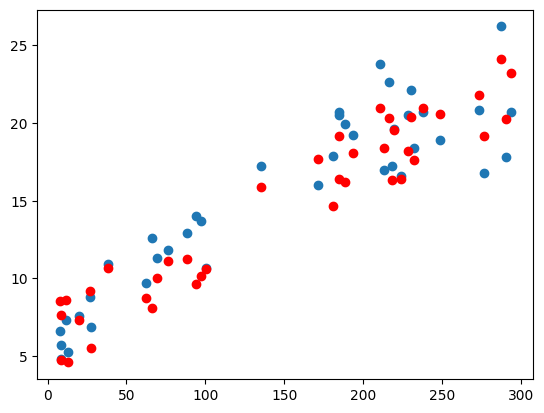

In [ ]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')
plt.show()

###Graph of Predictions for Newspaper Data

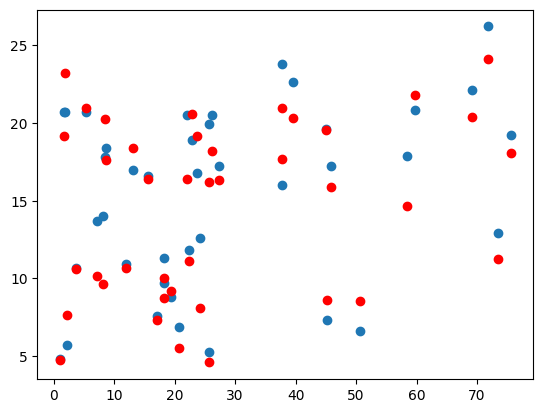

In [ ]:
plt.scatter(x_val[:, 1], y_val)
plt.scatter(x_val[:, 1], y_pred, color='r')
plt.show()

###Graph of Predictions for Radio Data

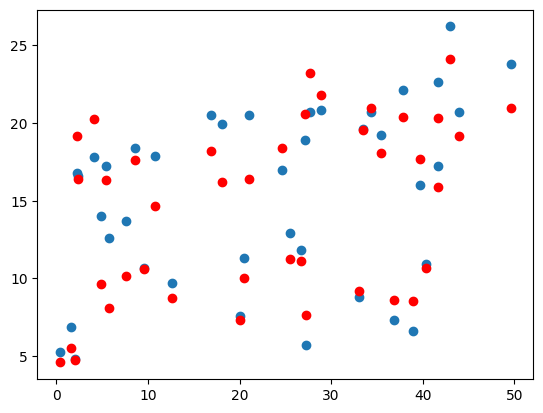

In [ ]:
plt.scatter(x_val[:, 2], y_val)
plt.scatter(x_val[:, 2], y_pred, color='r')
plt.show()

###Graph of Predictions for TV, Newspaper, Radio Data in **3D Scatter Plot**

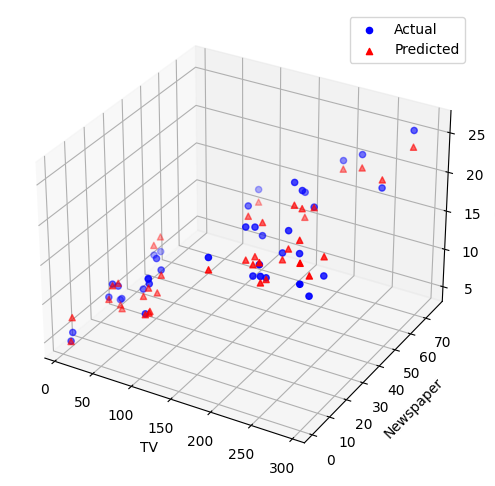

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(x_val[:, 0], x_val[:, 1], y_val, label='Actual', c='b', marker='o')

# Scatter plot for predicted values
ax.scatter(x_val[:, 0], x_val[:, 1], y_pred, label='Predicted', c='r', marker='^')

# Set labels
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')

# Add a legend
ax.legend()

# Show the plot
plt.show()
